<a href="https://colab.research.google.com/github/wonjae124/2021_Lab_project/blob/main/CIFAR10_classifier_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
#미니배치, 에폭의 관계 https://mole-starseeker.tistory.com/59
 
import torch
import torchvision
import torchvision.transforms as transforms


In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5),(0.5, 0.5, 0.5))])

batch_size = 4
#epoch는 전체 훈련 데이터셋을 사용하여 학습 하였을 때, 1epoch라고 함
#minibatch는 전체 데이터 셋을 몇 개의 데이터 셋으로 나누었을 때, 그 작은 데이터 셋 뭉치임
#한 개의 미니 배치에 넘겨주는 데이터 개수는 batch_size는 4임.
#iteration은 한 번의 미니배치를 학습 할 때를 말함. iteration의 수 = minibatch의 수

trainset = torchvision.datasets.CIFAR10(root = './data', train=True, download = True, transform = transform)
# trainset의 개수는 50,000개
# 한 개의 미니 배치에 넘겨주는 데이터 개수는 batch_size = 4임
# minibatch의 개수는 12,500개
# 1epoch은 모든 훈련 데이터셋을 사용하므로 모든 미니 배치로 학습을 함
# 미니 배치의 수와 같은 iteration은 12,500번 발생 함
# iteration 수만큼 가중치가 update 된다. 1epoch당 12,500번의 역전파 발생으로 가중치 갱신
# 4개마다(1 batch_size) 1번의 가중치 갱신
trainloader = torch.utils.data.DataLoader(trainset,batch_size = batch_size, shuffle=True, num_workers = 2)
testset = torchvision.datasets.CIFAR10(root='./data', train = False, download = True, transform = transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle = False, num_workers = 2 )

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

print(trainset[0][0].shape)
print(testset[0][0].shape)
print(trainset)
print(len(trainloader))

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )
12500


In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))   # 3 by 32 by 32 -> 32 by 32 by 3
    plt.show()

In [6]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(trainset[0][0].shape)
print(type(dataiter))
print(type(images))
print(images.shape)
print(labels.shape)
print(len(trainloader))

torch.Size([3, 32, 32])
<class 'torch.utils.data.dataloader._MultiProcessingDataLoaderIter'>
<class 'torch.Tensor'>
torch.Size([4, 3, 32, 32])
torch.Size([4])
12500


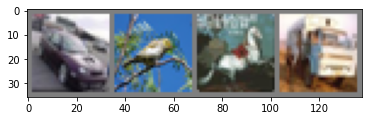

car   bird  horse truck


In [ ]:
imshow(torchvision.utils.make_grid(images))

print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [ ]:
train_t = np.transpose(images,(0,2,3,1)) # 4 by 3 by 32 by 32 -> 4 by 32 by 32 by 3
train_t.shape

torch.Size([4, 32, 32, 3])

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # 배치를 제외하고 flatten 하겠다??
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum = 0.9)

In [ ]:
for epoch in range(2): #총 epoch은 2회다. epoch = 0, 1까지다.
                       #미니 배치의 수 = iteration 횟수는 총 25,000번이다.

    running_loss = 0.0
    for i, data in enumerate(trainloader,0):
        inputs, labels = data
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward
        optimizer.step()

        running_loss += loss.item()
        if i%1000 == 999: #2500개의 미니배치마다 출력한다. 총 10번 출력 됨
            print(f'[{epoch+1}, {i+1:5d}] loss: {running_loss / 1000 :.3f}')
            running_loss = 0.0



[1,  1000] loss: 2.304
[1,  2000] loss: 2.306
[1,  3000] loss: 2.305
[1,  4000] loss: 2.307
[1,  5000] loss: 2.306
[1,  6000] loss: 2.305
[1,  7000] loss: 2.307
[1,  8000] loss: 2.304
[1,  9000] loss: 2.304
[1, 10000] loss: 2.304
[1, 11000] loss: 2.305
[1, 12000] loss: 2.305
[2,  1000] loss: 2.307
[2,  2000] loss: 2.306
[2,  3000] loss: 2.305
[2,  4000] loss: 2.306
[2,  5000] loss: 2.304
[2,  6000] loss: 2.307
[2,  7000] loss: 2.304
[2,  8000] loss: 2.305
[2,  9000] loss: 2.305
[2, 10000] loss: 2.305
[2, 11000] loss: 2.307
[2, 12000] loss: 2.305


In [ ]:
print('Finished Training')

Finished Training


In [1]:
trainloader_split = random_split(trainloader,[40000,10000])

NameError: ignored